## Data Visualization menggunakan datasets titanic.csv untuk menganalisa informasi Single Variable, Two Variable dan Multi Variable.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

### Data Loading

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
print(f"Rows: {df_titanic.shape[0]}")
print(f"Columns: {df_titanic.shape[1]}")

Rows: 891
Columns: 12


Fitur data :
1. Survived : status keselamatan penumpang (0 = not survived, 1 = survived)
2. Pcalss   : kelas tiket (1,2,3)
3. Name     : nama penumpang
4. Sex      : jens kelamin penumpang
5. Age      : umur penumpang dalam tahun
6. SibSp    : saudara kandung / pasangan di kapal titanic
7. parch    : orang tua / anak-anak di kapal titanic
8. Ticket   : nomor tiket
9. Fare     : tarif
10. Cabin   : nomor cabin
11. Emnacked: pelabuhan keberangkatan (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check Missing Values

In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())

In [7]:
df_titanic['Cabin'] = df_titanic['Cabin'].fillna(df_titanic['Cabin'].mode()[0])
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [8]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df_titanic['Age'] = df_titanic['Age'].astype('int64')

In [10]:
df_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.544332    0.523008   
std     257.353842    0.486592    0.836071   13.013778    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Data Visualization

### Single Variabel

Mengetahui jumlah penumpang yang selamat

/home/salamah/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/salamah/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


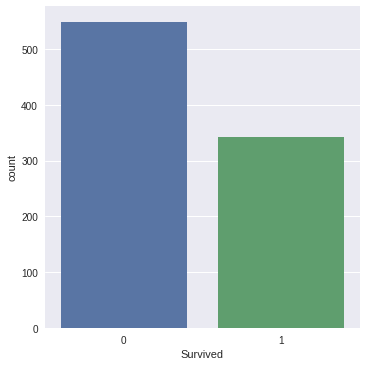

In [11]:
#single
sns.factorplot('Survived',data=df_titanic,kind='count')

Mengetahui distribusi usia 

/home/salamah/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


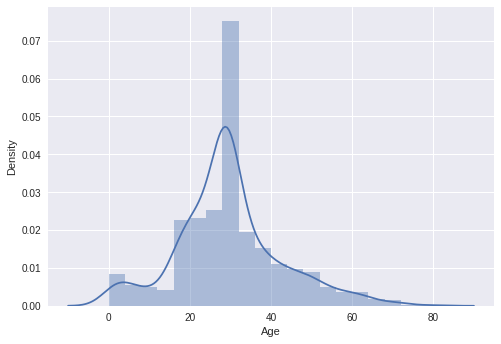

In [12]:
sns.distplot(df_titanic['Age'], bins=20)
plt.show()

Mengetahui banyaknya penumpang laki-laki dan wanita 

([<matplotlib.patches.Wedge at 0x7f4c77be8a10>,
 [Text(-0.5143065688476861, 1.028585802565892, 'Male'),
  Text(0.5143066651508367, -1.0285857544130317, 'Female')],
 [Text(-0.2906950171747791, 0.5813745840589825, '64.8%'),
  Text(0.29069507160699465, -0.5813745568421483, '35.2%')])

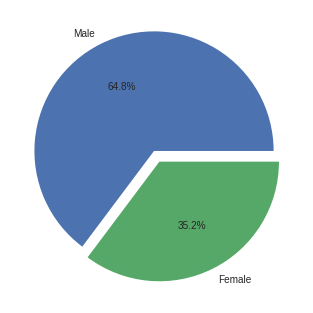

In [13]:
plt.pie([df_titanic['Sex'][df_titanic['Sex']=='male'].count(), df_titanic['Sex'][df_titanic['Sex']=='female'].count()],
        labels=['Male', 'Female'], 
        autopct='%1.1f%%',explode=[0.05]*2)

In [14]:
df_titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

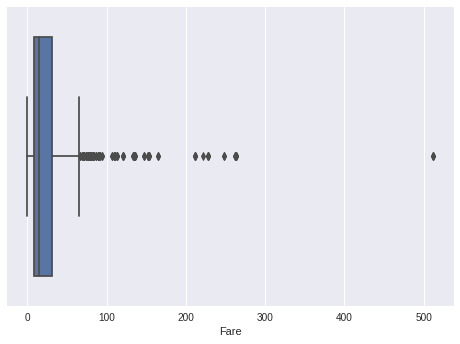

In [15]:
sns.boxplot(data=df_titanic, x='Fare')

In [16]:
df_titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Two Variabel

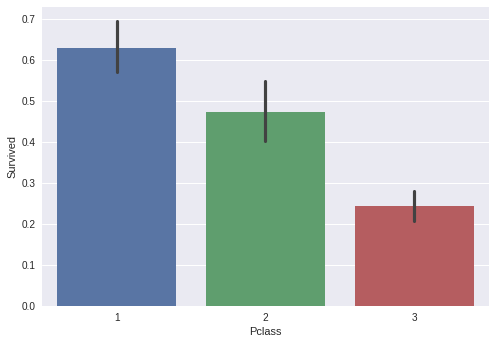

In [17]:
sns.barplot(x = 'Pclass', y = 'Survived', data=df_titanic)

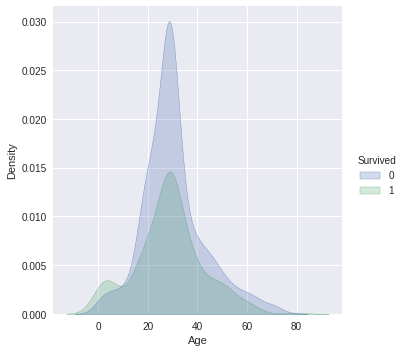

In [32]:
sns.displot(df_titanic, x=df_titanic['Age'], hue=df_titanic['Survived'], kind='kde', fill=True)

/home/salamah/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


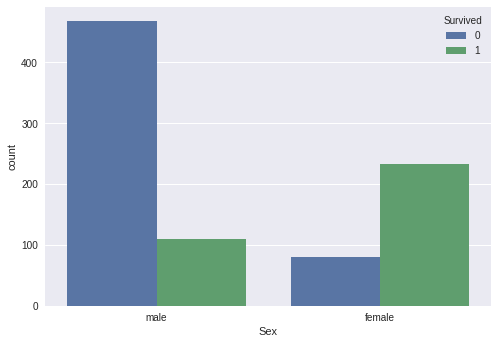

In [33]:
sns.countplot('Sex', hue='Survived', data=df_titanic)

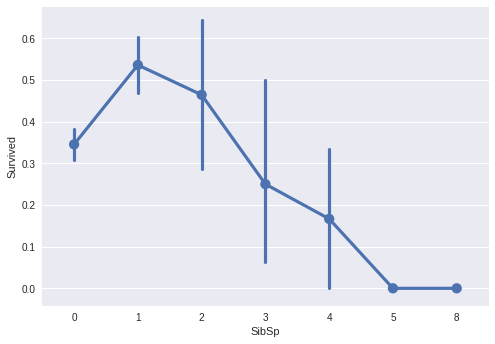

In [34]:
sns.pointplot(x = 'SibSp', y = 'Survived', data = df_titanic)

### Multi Variabel

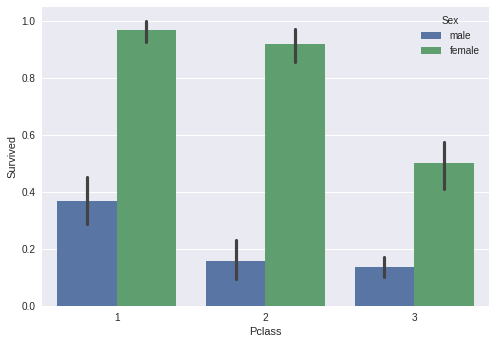

In [28]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_titanic)

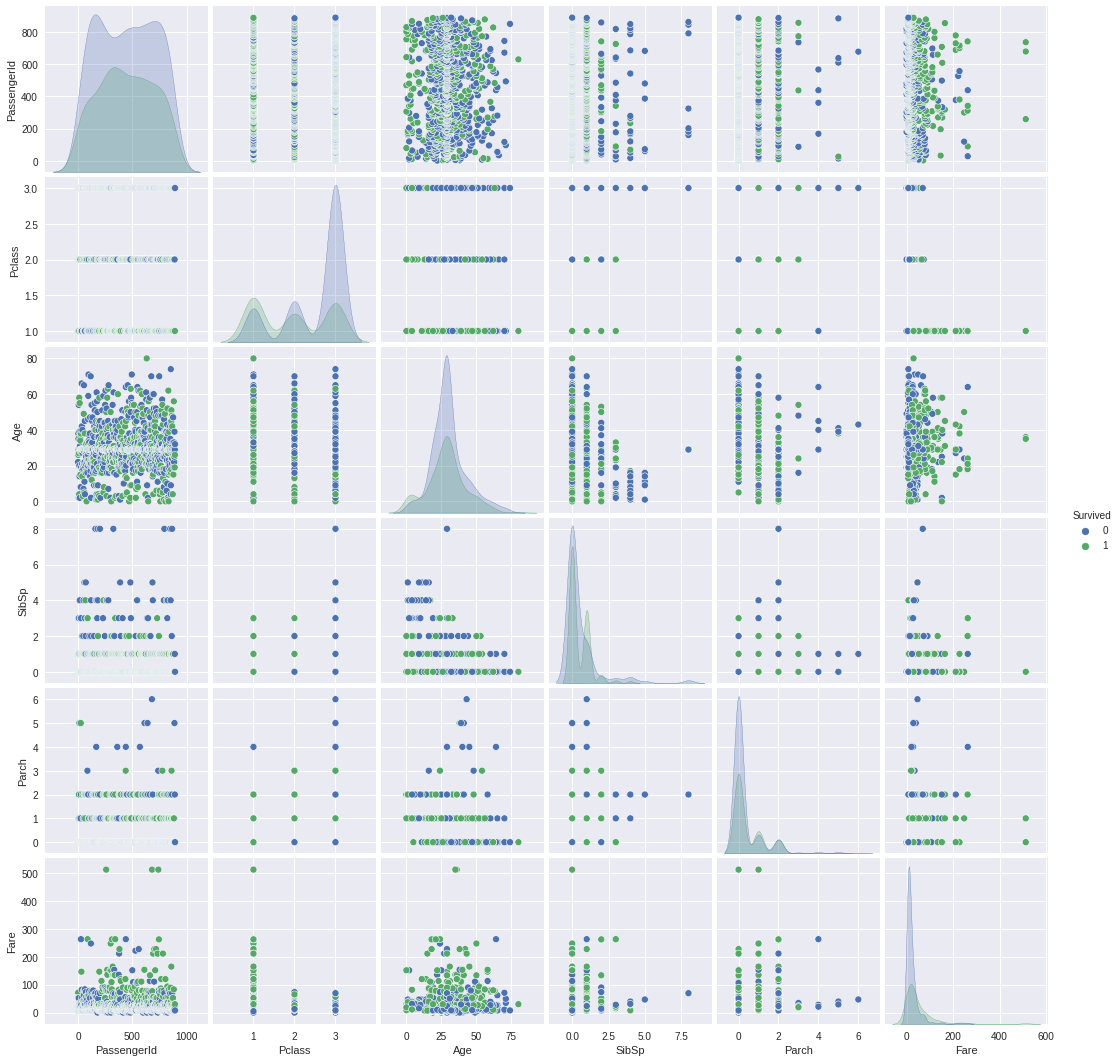

In [36]:
sns.pairplot(data=df_titanic, hue='Survived')
plt.show()

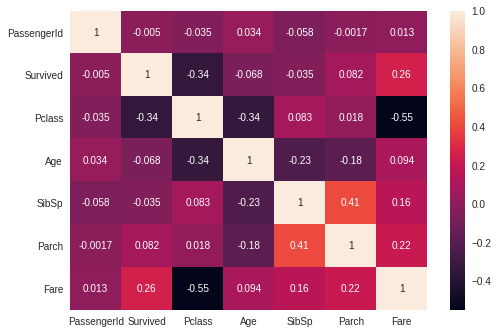

In [38]:
sns.heatmap(data=df_titanic.corr(), annot=True)
plt.show()